In [1]:
!ls

CNN.ipynb  logs  test  train


In [55]:
import numpy as np
from tensorflow import keras
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import load_img
import os
from tensorflow.keras.callbacks import *
from tensorflow.keras.metrics import *

In [56]:
# set directories for training data
TRAIN_DIR_DATA = "./train/data/"
TRAIN_DIR_LABEL = "./train/label/"
VAL_DIR_DATA = "./test/data/"
VAL_DIR_LABEL = "./test/label/"

MEMO_DIR = "./memo/"

# DATA

In [57]:

def get_data(data_files):

    data = None
    label = None
    for dfile in data_files:
        if np.array_equal(data,None): 
            data = np.load(TRAIN_DIR_DATA + dfile)
            label = np.load(TRAIN_DIR_LABEL + dfile.split(".")[0] + " label.npy")
        else: 
            data = np.concatenate((data,np.load(TRAIN_DIR_DATA + dfile)))
            label = np.concatenate((label,np.load(TRAIN_DIR_LABEL + dfile.split(".")[0] + " label.npy")) )
    data = np.reshape(data,(data.shape[0],data.shape[1],data.shape[2],1))
    label = np.reshape(label,(label.shape[0],label.shape[1],label.shape[2],1))
    return data,label


data_files = os.listdir(TRAIN_DIR_DATA)[:2]  
data,label = get_data(data_files)
# print(data[0])
# print(label[0])


In [58]:
class JubeatDataset(keras.utils.Sequence):
    """Helper to iterate over the data (as Numpy arrays)."""

    def __init__(self, batch_size, img_size, input_img, target_img):
        self.batch_size = batch_size
        self.img_size = img_size
        self.input_img = input_img
        self.target_img = target_img

    def __len__(self):
        return len(self.target_img) // self.batch_size

    def __getitem__(self, idx):
        """Returns tuple (input, target) correspond to batch #idx."""
        i = idx * self.batch_size
        x = self.input_img[i : i + self.batch_size]
        y = self.target_img[i : i + self.batch_size]
        return x, y

# Model

In [59]:
img_size = (4, 4)
num_classes = 11
batch_size = 8

train_gen = JubeatDataset(batch_size,img_size,data,label)

In [60]:
# Define the model here 
input_height = 4
input_width = 4
n_classes = 11

# Encoder layer 
img_input = Input(shape=(input_height,input_width,1))

conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(img_input)
conv1 = Dropout(0.2)(conv1)
conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Dropout(0.2)(conv2)
conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

#Decoder layer 
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2)
conv3 = Dropout(0.2)(conv3)
conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(conv3)

up1 = concatenate([UpSampling2D((2, 2))(conv3), conv2], axis=-1)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(up1)
conv4 = Dropout(0.2)(conv4)
conv4 = Conv2D(64, (3, 3), activation='relu', padding='same')(conv4)

up2 = concatenate([UpSampling2D((2, 2))(conv2), conv1], axis=-1)
conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(up2)
conv5 = Dropout(0.2)(conv5)
conv5 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv5)

out = Conv2D( n_classes, (1, 1) , padding='same')(conv5)

model = keras.Model(img_input, out)
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy')
model.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_6 (InputLayer)            [(None, 4, 4, 1)]    0                                            
__________________________________________________________________________________________________
conv2d_42 (Conv2D)              (None, 4, 4, 32)     320         input_6[0][0]                    
__________________________________________________________________________________________________
dropout_19 (Dropout)            (None, 4, 4, 32)     0           conv2d_42[0][0]                  
__________________________________________________________________________________________________
conv2d_43 (Conv2D)              (None, 4, 4, 32)     9248        dropout_19[0][0]                 
____________________________________________________________________________________________

In [7]:
# Define the model here 
input_height = 4
input_width = 4
n_classes = 11

# Encoder layer 
img_input = Input(shape=(input_height,input_width,1))

conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(img_input)
conv1 = Dropout(0.2)(conv1)
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Dropout(0.2)(conv2)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

up2 = concatenate([UpSampling2D((2, 2))(conv2), conv1], axis=-1)
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
conv5 = Dropout(0.2)(conv5)
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)

img_input = Input(shape=(input_height,input_width,1))

conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(img_input)
conv1 = Dropout(0.2)(conv1)
conv1 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv1)
pool1 = MaxPooling2D((2, 2))(conv1)

conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(pool1)
conv2 = Dropout(0.2)(conv2)
conv2 = Conv2D(32, (3, 3), activation='relu', padding='same')(conv2)
pool2 = MaxPooling2D((2, 2))(conv2)

up2 = concatenate([UpSampling2D((2, 2))(conv2), conv1], axis=-1)
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(up2)
conv5 = Dropout(0.2)(conv5)
conv5 = Conv2D(16, (3, 3), activation='relu', padding='same')(conv5)

out = Conv2D( n_classes, (1, 1) , padding='same')(conv5)

model = keras.Model(img_input, out)



# Training

In [61]:
import tensorflow as tf
from tensorflow.keras.optimizers import *

# model = keras.Model(img_input, out)
# model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy')
# model.summary()

# checkpoint_filepath = './checkpoint/model.h5'
# metrics = [tf.keras.metrics.MeanIoU(num_classes=num_classes),]


callbacks = [
        
    ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='loss',
    mode='max',
    save_best_only=True),
#     ModelCheckpoint("oxford_segmentation.h5", save_best_only=True),
    TensorBoard(log_dir='./logs',histogram_freq=0,
                write_graph=True, write_images=True)
]

epochs = 50
history = model.fit(train_gen, epochs=epochs, validation_data=None, callbacks=callbacks)


Epoch 1/50
161/161 [==============================] - 2s 15ms/step - loss: 0.6823
Epoch 2/50
161/161 [==============================] - 1s 6ms/step - loss: 0.3484
Epoch 3/50
161/161 [==============================] - 1s 9ms/step - loss: 0.2480
Epoch 4/50
161/161 [==============================] - 1s 6ms/step - loss: 0.2887
Epoch 5/50
161/161 [==============================] - 1s 6ms/step - loss: 0.2322
Epoch 6/50
161/161 [==============================] - 1s 5ms/step - loss: 0.2349
Epoch 7/50
161/161 [==============================] - 1s 5ms/step - loss: 0.2335
Epoch 8/50
161/161 [==============================] - 1s 5ms/step - loss: 0.2106
Epoch 9/50
161/161 [==============================] - 1s 7ms/step - loss: 0.2181
Epoch 10/50
161/161 [==============================] - 1s 5ms/step - loss: 0.2180
Epoch 11/50
161/161 [==============================] - 1s 5ms/step - loss: 0.2377
Epoch 12/50
161/161 [==============================] - 1s 6ms/step - loss: 0.2515
Epoch 13/50
161/161 [===

In [31]:
model.load_weights(checkpoint_filepath)

# loss, acc = model.evaluate(data[:5], label[:5], verbose=2)
# print("Untrained model, accuracy: {:5.2f}%".format(100 * acc))

train_preds = model.predict(train_gen)
# train_preds[0].astype(int)

mask = np.argmax(train_preds[0], axis=-1)
mask


array([[0, 0, 0, 0],
       [0, 3, 0, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [45]:
# compare with your eyes bijjjj

def display(pred,label,i):
    mask = np.argmax(pred[i], axis=-1)
    print("PREDICTION")
    print(mask)
    print("LABEL")
    print(label[i].reshape(label[i].shape[0],label[i].shape[1]))
    print("\n")
    
for i in range(500,510):
    display(train_preds,label,i)




PREDICTION
[[0 0 0 0]
 [3 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
LABEL
[[0 0 0 0]
 [4 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


PREDICTION
[[0 0 0 0]
 [0 0 0 3]
 [0 0 0 0]
 [0 0 0 0]]
LABEL
[[0 0 0 0]
 [0 0 0 7]
 [0 0 0 0]
 [0 0 0 0]]


PREDICTION
[[0 0 0 0]
 [0 0 0 0]
 [0 3 0 0]
 [0 0 0 0]]
LABEL
[[0 0 0 0]
 [0 0 0 0]
 [0 5 0 0]
 [0 0 0 0]]


PREDICTION
[[0 0 0 0]
 [0 0 3 0]
 [0 0 0 0]
 [0 0 0 0]]
LABEL
[[0 0 0 0]
 [0 0 7 0]
 [0 0 0 0]
 [0 0 0 0]]


PREDICTION
[[3 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]
LABEL
[[4 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]]


PREDICTION
[[0 0 0 0]
 [0 3 0 0]
 [0 0 0 0]
 [0 0 0 0]]
LABEL
[[0 0 0 0]
 [0 5 0 0]
 [0 0 0 0]
 [0 0 0 0]]


PREDICTION
[[0 0 0 0]
 [0 0 0 0]
 [0 0 3 0]
 [0 0 0 0]]
LABEL
[[0 0 0 0]
 [0 0 0 0]
 [0 0 6 0]
 [0 0 0 0]]


PREDICTION
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [3 0 0 0]]
LABEL
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 0]
 [5 0 0 0]]


PREDICTION
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 3]
 [0 0 0 0]]
LABEL
[[0 0 0 0]
 [0 0 0 0]
 [0 0 0 6]
 [0 0 0 0]]


PREDICTION
[[0 0 0 

In [46]:

img_size = (4, 4)
num_classes = 11
batch_size = 16

a = np.array([[[0, 0, 0, 0],
               [0, 1, 1, 0],
               [0, 1, 1, 0],
               [0, 0, 0, 0]],
              [[0, 0, 1, 0],
               [1, 1, 1, 1],
               [0, 0, 1, 0],
               [0, 0, 1, 0]]])

b = np.array([[[0, 0, 0, 0],
               [0, 4, 7, 0],
               [0, 5, 6, 0],
               [0, 0, 0, 0]],
              [[0, 0, 8, 0],
               [3, 4, 7, 9],
               [0, 0, 6, 0],
               [0, 0, 5, 0]]])

a = np.reshape(a,(a.shape[0],a.shape[1],a.shape[2],1))
b = np.reshape(b,(b.shape[0],b.shape[1],b.shape[2],1))

test_gen = JubeatDataset(2,img_size,a,b)

test = model.predict(test_gen)

testmask = np.argmax(test[1], axis=-1)

testmask



array([[0, 0, 0, 0],
       [0, 0, 9, 0],
       [0, 0, 0, 0],
       [0, 0, 0, 0]])

In [62]:
data_files = os.listdir(TRAIN_DIR_DATA)[:1]         
data,label = get_data(data_files)

print(len(data),len(label))

test1_gen = JubeatDataset(1,img_size,data,label)
test1 = model.predict(test1_gen)

finger_array = []
for array in test1: 
    finger_array.append(np.argmax(array, axis=-1))
    
len(finger_array)
    


706 706


706

In [48]:
from jubeatnet.core import PatternFingering, Pattern, JubeatChartFingering
from jubeatnet.parsers import CosmosMemoParser
from pathlib import Path

memo = Path(MEMO_DIR + data_files[0].lower().replace(" ","_").replace("npy","txt"))
parser = CosmosMemoParser()
chart = parser.parse(memo)
sequence = JubeatChartFingering(chart,"red zone",None)

for idx in range(len(finger_array)):
    pattern = chart.sequence[idx][1]
    index = chart.sequence[idx][0]
    fingering = PatternFingering(pattern)
    fingering.set_finger_matrix(finger_array[idx])
    sequence.set_pattern_fingering(idx,fingering)
    
jsonstring = sequence.to_json_string()
with open("red_zone1.json","w") as f:
    f.write(jsonstring)

In [49]:
import tensorflow as tf



true = np.array(label).flatten().astype(float)
pred = np.array(finger_array).flatten()
true1 = tf.convert_to_tensor(true)
pred1 = tf.convert_to_tensor(pred)


iou,conf_mat = tf.compat.v1.metrics.mean_iou(
    true1, pred1, 11, weights=None, metrics_collections=None,
    updates_collections=None, name=None
)

with tf.Session() as sess:
    sess.run(tf.local_variables_initializer())
    sess.run(tf.global_variables_initializer())

    sess.run([conf_mat])
    res = sess.run(iou)

res

# print(len(true),len(pred))

0.14578953

In [50]:
def get_traversal_cost(pred):
    centroids = []
    values = []
    # Find centroids and save values for each finger
    for i in range(1,11):
        value = np.array([])
        for j in pred: 
            pos = np.array(np.where(j == i)).transpose()
            if len(value)==0:
                value = pos
            else:                 
                value = np.concatenate((value,pos))
        if len(value) >0:
            value = np.array(value)
            x_coords = [p[0] for p in value]
            y_coords = [p[1] for p in value]
            _len = len(x_coords)
            centroid_x = sum(x_coords)/_len
            centroid_y = sum(y_coords)/_len
            centroids.append([centroid_x,centroid_y])
            values.append([x_coords,y_coords])
    size = len(values[0])
    cost = 0
    for centroid,value in zip(centroids,values):
        x_coords = value[0]
        y_coords = value[1]
        x = sum([(i-centroid[0])**2 for i in x_coords])
        y = sum([(j-centroid[1])**2 for j in y_coords])
        avg = (x+y)/size
        cost += avg
    return cost

get_traversal_cost(finger_array)
        

1056.6688673708932

In [63]:
finger_array = np.array(finger_array)
values = {}
for i in range(1,11):
    if i not in values: 
        values[i] = np.count_nonzero(finger_array == i)
    else: 
        values[i] += np.count_nonzero(finger_array == i)
                    
values

{1: 0, 2: 732, 3: 0, 4: 0, 5: 1, 6: 0, 7: 2, 8: 0, 9: 69, 10: 68}

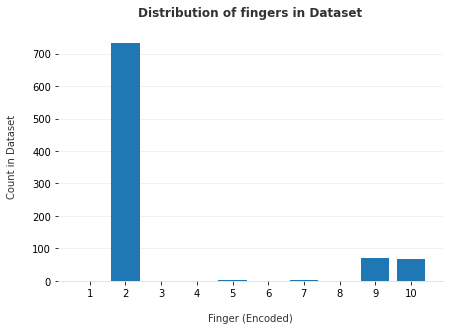

In [64]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

# values = values.values()


# ax.hlines(y=values, xmin=0, xmax=max(values), color='#007acc', alpha=0.2, linewidth=5)

fingers = [i for i in range(1,11)]
# ax.bar(fingers, values)
bars = ax.bar(
    x=np.arange(len(values)),
    height=list(values.values()),
    tick_label=fingers
)
plt.rc('font', family='Open Sans')

# bar_color = bars[0].get_facecolor()
# for bar in dist:
#   ax.text(
#       bar.get_x() + bar.get_width() / 2,
#       bar.get_height() + 0.3,
#       round(bar.get_height(), 1),
#       horizontalalignment='center',
#       color=bar_color,
#       weight='bold'
#   )

# ax.legend()
# ax.yaxis.grid(True, color='#EEEEEE')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')

fig.tight_layout()
# plt.xticks(values, tuple([str(i) for i in range(1,11)]))
ax.set_xlabel('Finger (Encoded)', labelpad=15, color='#333333')
ax.set_ylabel('Count in Dataset', labelpad=15, color='#333333')
ax.set_title('Distribution of fingers in Dataset', pad=15, color='#333333',
             weight='bold')

plt.show()

In [53]:
values1 = [sum(list(values)[:5]),sum(list(values)[5:])]
values1


values1= [250,550]

[250, 550]


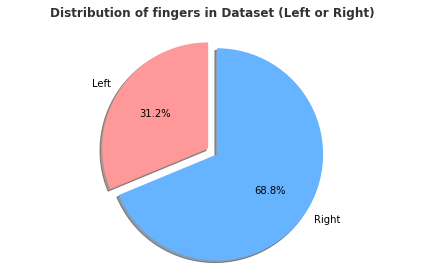

In [54]:
# Pie chart
labels = ['Left','Right']
import matplotlib.pyplot as plt

print(values1)
# Pie chart
# labels = ['Frogs', 'Hogs', 'Dogs', 'Logs']
# sizes = [15, 30, 45, 10]
# only "explode" the 2nd slice (i.e. 'Hogs')
explode = (0, 0.1)
#add colors
colors = ['#ff9999','#66b3ff']
fig1, ax1 = plt.subplots()
ax1.pie(values1, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')

ax1.set_title('Distribution of fingers in Dataset (Left or Right)', pad=15, color='#333333',
             weight='bold')
plt.tight_layout()
plt.show()